In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
hidden_dim_1 = 256
hidden_dim_2 = 128
original_dim = 784
eta = 1e-3
momentum =8e-1 
batch_size = 256
max_epochs = 10

In [3]:
(X_train, _),(X_test, _) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

X_train = np.reshape(X_train, (X_train.shape[0], original_dim))
X_test = np.reshape(X_test, (X_test.shape[0], original_dim))

noise = np.random.normal(loc = 0.5, scale = 0.5, size = X_train.shape).astype(np.float32)
X_train_noisy = X_train + noise
noise = np.random.normal(loc = 0.5, scale = 0.5, size = X_test.shape).astype(np.float32)
X_test_noisy = X_test + noise

training_dataset = tf.data.Dataset.from_tensor_slices(X_train).batch(batch_size)
training_dataset_noisy = tf.data.Dataset.from_tensor_slices(X_train_noisy).batch(batch_size)

In [4]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, hidden_dim1, hidden_dim2):
        super(Encoder, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units = hidden_dim1,
                activation = 'relu')
        self.hidden_layer_2 = tf.keras.layers.Dense(units = hidden_dim2,
                activation = 'relu')
   
    def call(self, input_features):
        activation = self.hidden_layer_1(input_features)
        activation = self.hidden_layer_2(activation)
        return activation

In [5]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, hidden_dim_2, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=hidden_dim_2,
            activation='relu')
        self.output_layer = tf.keras.layers.Dense(units=original_dim,
            activation='relu')
        
    def call(self, encoded):
        activation = self.hidden_layer(encoded)
        activation = self.output_layer(activation)
        return activation

In [6]:
class Autoencoder(tf.keras.Model):
    def __init__(self, hidden_dim_1, hidden_dim_2, original_dim):
        super(Autoencoder, self).__init__()
        self.loss = []
        self.encoder = Encoder(hidden_dim_1, hidden_dim_2)
        self.decoder = Decoder(hidden_dim_2, original_dim)
        
    def call(self, input_features):
        encoded = self.encoder(input_features)
        reconstructed = self.decoder(encoded)
        return reconstructed

In [8]:
model = Autoencoder(hidden_dim_1, hidden_dim_2, original_dim)
model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.Adam(learning_rate = eta))

In [9]:
history = model.fit(X_train_noisy,
                    X_train,
                    validation_data = (X_test_noisy, X_test),
                    epochs = max_epochs,
                    batch_size = batch_size)

Epoch 1/10
235/235 [==============================] - 13s 56ms/step - loss: 0.0462 - val_loss: 0.0303
Epoch 2/10
235/235 [==============================] - 11s 46ms/step - loss: 0.0279 - val_loss: 0.0255
Epoch 3/10
235/235 [==============================] - 11s 45ms/step - loss: 0.0248 - val_loss: 0.0235
Epoch 4/10
235/235 [==============================] - 11s 47ms/step - loss: 0.0233 - val_loss: 0.0226
Epoch 5/10
235/235 [==============================] - 13s 54ms/step - loss: 0.0225 - val_loss: 0.0221
Epoch 6/10
235/235 [==============================] - 10s 44ms/step - loss: 0.0219 - val_loss: 0.0215
Epoch 7/10
235/235 [==============================] - 10s 44ms/step - loss: 0.0214 - val_loss: 0.0212
Epoch 8/10
235/235 [==============================] - 10s 43ms/step - loss: 0.0211 - val_loss: 0.0209
Epoch 9/10
235/235 [==============================] - 11s 47ms/step - loss: 0.0208 - val_loss: 0.0207
Epoch 10/10
235/235 [==============================] - 12s 51ms/step - loss: 0.020

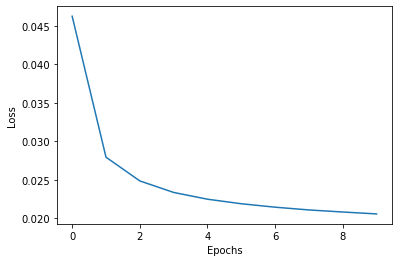

In [10]:
plt.plot(range(max_epochs), history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

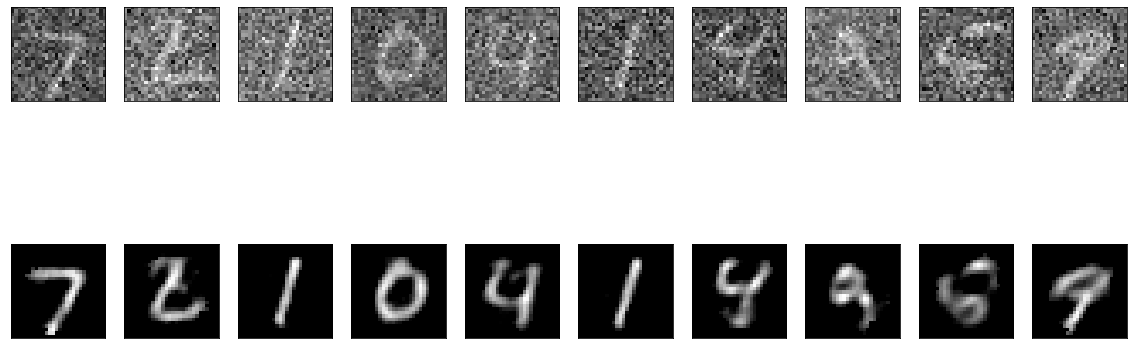

In [11]:
reconstructed = model(X_test_noisy).numpy()
number = 10
plt.figure(figsize = (20, 8))
for index in range(number):
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(X_test_noisy[index].reshape(28,28), cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(reconstructed[index].reshape(28,28), cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()